# UW Data Science 350
## Winter 2017
### Dave Wine 8430191
### Assignment #8 - Time Series Analysis

# Summary
1. The ice cream data is not stationary, and it has a strong seasonal component.  Even after removing the yearly data, there appears to be a slower (2-3 year? slow sinusoidal component in the residuals.
2. The best fit ARMA model is: ARIMA(3,0,1)(0,0,2)[12] with non-zero mean (d's turned to zero since an ARMA model was requested).
3. The confidence intervals grow as the forecast proceeds, reaching (for 95% confidence) about one third of the mean (23 vs a mean of 61).  They do not seem reasonably small!
4. However if drift is included (d's != 0), the best fit model is ARIMA(3,0,1)(1,1,2)[12] with drift and the residuals confidence intervals drop to about 11 vs a mean of 61 - less than 20%, and an improvement of a factor of 2.

In [23]:
### Libraries
require ('repr') 
require ('ggplot2') 
require ('dplyr') 
require ('HistData') 
require ('gridExtra') 
require ('forecast')

In [24]:
### Functions

# File read function
read.datafile = function(file = 'Automobile price data _Raw_.csv',skip=0){
  datafile.data <- read.csv(file, header=TRUE, stringsAsFactors=FALSE,skip=skip)

}

## Plot
dist.ts = function(df, col = 'residual', bins = 40){
  par(mfrow = c(1,2))
  temp = as.vector(df)
  breaks = seq(min(temp), max(temp), length.out = (bins + 1))
  hist(temp, breaks = breaks, main = paste('Distribution of ', col), xlab = col)
  qqnorm(temp, main = paste('Normal Q-Q plot of ', col))
  par(mfrow = c(1,1))
}

## ACF plots
plot.acf <- function(df, col = 'remainder', is.df =TRUE){
  if(is.df) temp <- df[, col]
  else temp <- df
  par(mfrow = c(2,1))
  acf(temp, main = paste('ACF of', col))
  pacf(temp, main = paste('PACF of', col))
  par(mfrow = c(1,1))
}

## Decomposition of the time series into components
ts.decomp <- function(df, col = 'elec.ts', span = 0.5, Mult = TRUE, is.df = TRUE){
  # if(Mult) temp = log(df[, col])  else temp = ts(df[, col]
  if(is.df) temp = log(df[, col])  
  else temp = df
  spans = span * length(temp)  
  fit <- stl(temp, s.window = "periodic", t.window = spans)
  plot(fit, main = paste('Decompositon of',col,'with lowess span = ', as.character(span)))
  fit$time.series
}

## Function for ARIMA model estimation
ts.model = function(ts, col = 'remainder', order = c(0,0,1)){
  mod = arima(ts, order = order, include.mean = FALSE)
  print(mod)
  mod
}


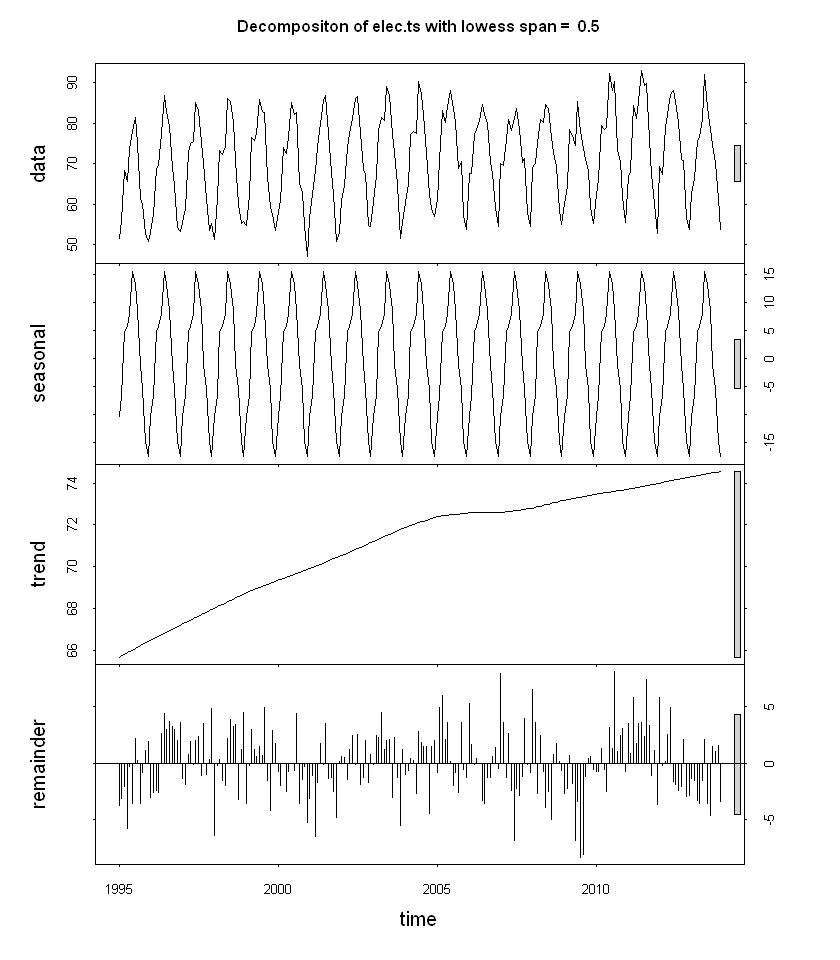

In [25]:
### Main Code
wd <- "C:/Users/Dave/Documents/GitHub/DataScience350/DataScience350/Lecture8/"
setwd(wd)

# Read in dairy data
dairy.data <-read.datafile("CADairyProduction.csv")

## Do ice cream

## STL decomposition
icrm <-ts(dairy.data[,4],start = dairy.data[1,1],freq=12)
icrm.decomp <- ts.decomp(icrm, Mult=TRUE, is.df=FALSE,span =0.5)



The ice cream data is not stationary, and it has a strong seasonal component.  Even after removing the yearly data, there appears to be a slower (2-3 year? slow sinusoidal component in the residuals.

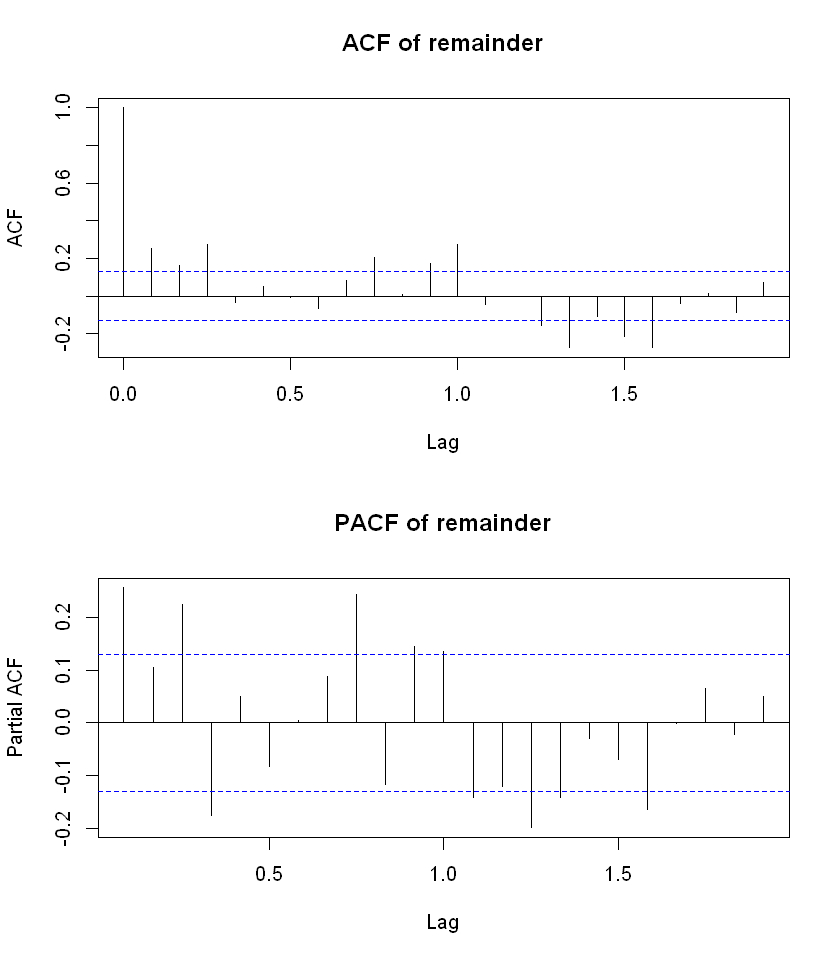

In [26]:
## Plot ACF
options(repr.pmales.extlot.width=8, repr.plot.height=8)
plot.acf(icrm.decomp[, 3], is.df = FALSE)

ACF comments


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
          ar1      ar2     ma1      ma2
      -0.7101  -0.0315  0.0355  -0.7303
s.e.   0.1029   0.0960  0.0811   0.0821

sigma^2 estimated as 7.798:  log likelihood = -555.87,  aic = 1121.75


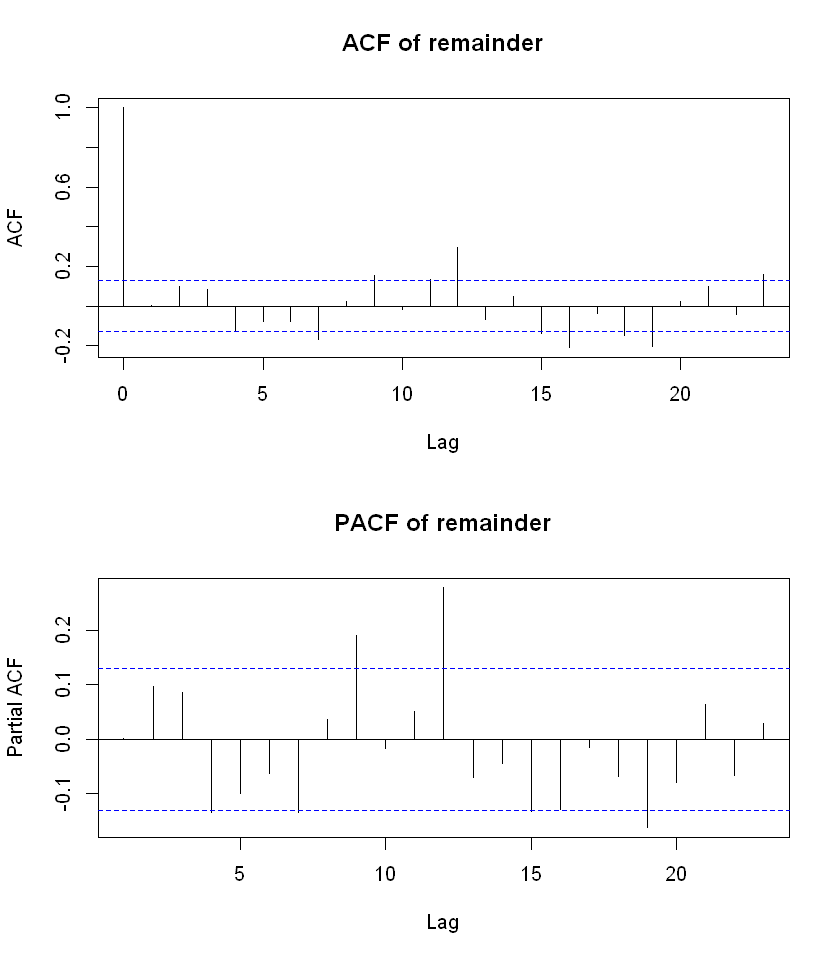

In [27]:
## ARIMA modeling
icrm.arima = ts.model(icrm.decomp[, 3], col = 'ARIMA model for ice cream', order = c(2,1,2))
plot.acf(icrm.arima$resid[-1], is.df = FALSE)

In [28]:
## Forecasting
fit.icrm = auto.arima(icrm, max.p=3, max.q=3,
                       max.P=2, max.Q=2, max.order=5, max.d=0, max.D=0,
                       start.p=0, start.q=0, start.P=0, start.Q=0)
summary(fit.icrm)

Series: icrm 
ARIMA(3,0,1)(0,0,2)[12] with non-zero mean 

Coefficients:
         ar1      ar2      ar3      ma1    sma1    sma2     mean
      1.2079  -0.1961  -0.3108  -0.5693  0.7137  0.4471  70.9040
s.e.  0.0844   0.1153   0.0670   0.0662  0.0665  0.0613   0.7673

sigma^2 estimated as 15.16:  log likelihood=-635.27
AIC=1286.55   AICc=1287.2   BIC=1313.98

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE     MASE
Training set 0.1167261 3.832854 2.963952 -0.2451859 4.295589 1.073858
                    ACF1
Training set -0.08072877



Forecast method: ARIMA(3,0,1)(0,0,2)[12] with non-zero mean

Model Information:
Series: icrm 
ARIMA(3,0,1)(0,0,2)[12] with non-zero mean 

Coefficients:
         ar1      ar2      ar3      ma1    sma1    sma2     mean
      1.2079  -0.1961  -0.3108  -0.5693  0.7137  0.4471  70.9040
s.e.  0.0844   0.1153   0.0670   0.0662  0.0665  0.0613   0.7673

sigma^2 estimated as 15.16:  log likelihood=-635.27
AIC=1286.55   AICc=1287.2   BIC=1313.98

Error measures:
                    ME     RMSE      MAE        MPE     MAPE     MASE
Training set 0.1167261 3.832854 2.963952 -0.2451859 4.295589 1.073858
                    ACF1
Training set -0.08072877

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2014       58.02116 53.03198 63.01035 50.39086 65.65146
Feb 2014       61.26692 55.34712 67.18673 52.21337 70.32048
Mar 2014       67.57527 60.99632 74.15422 57.51363 77.63691
Apr 2014       71.01272 64.30823 77.71721 60.75909 81.26636
May 2014       75.25155 68.54706 81.956

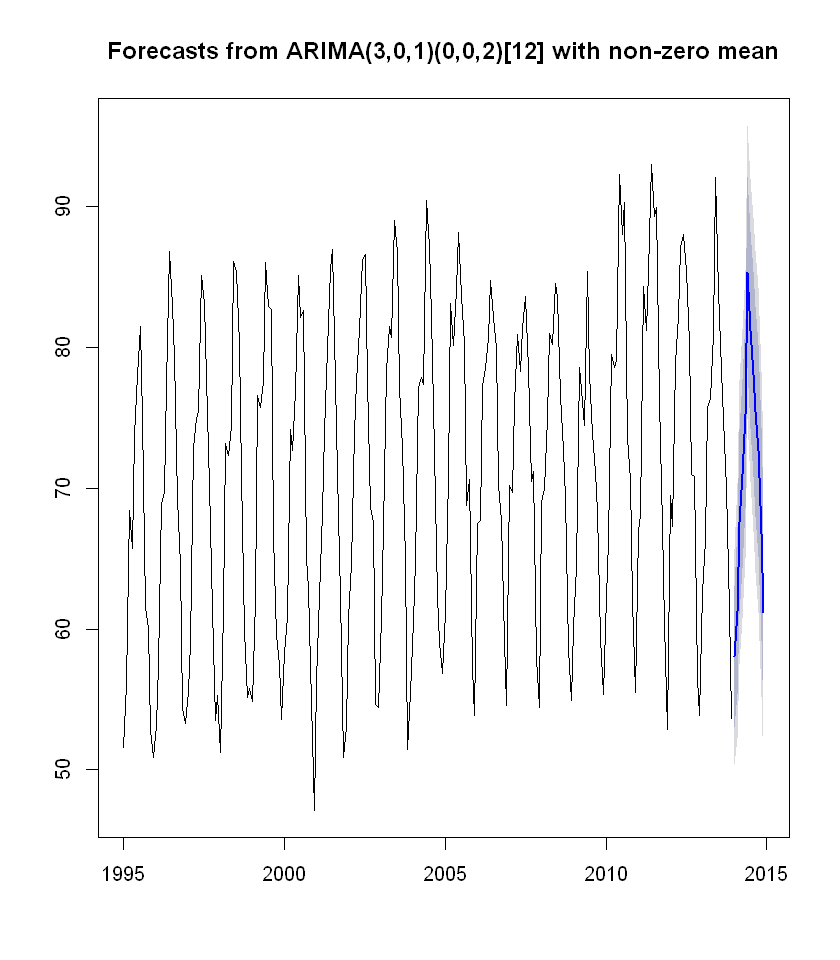

In [29]:
## Make the forecast for the next year
elect.forecast = forecast(fit.icrm, h=12)
summary(elect.forecast)
plot(elect.forecast)

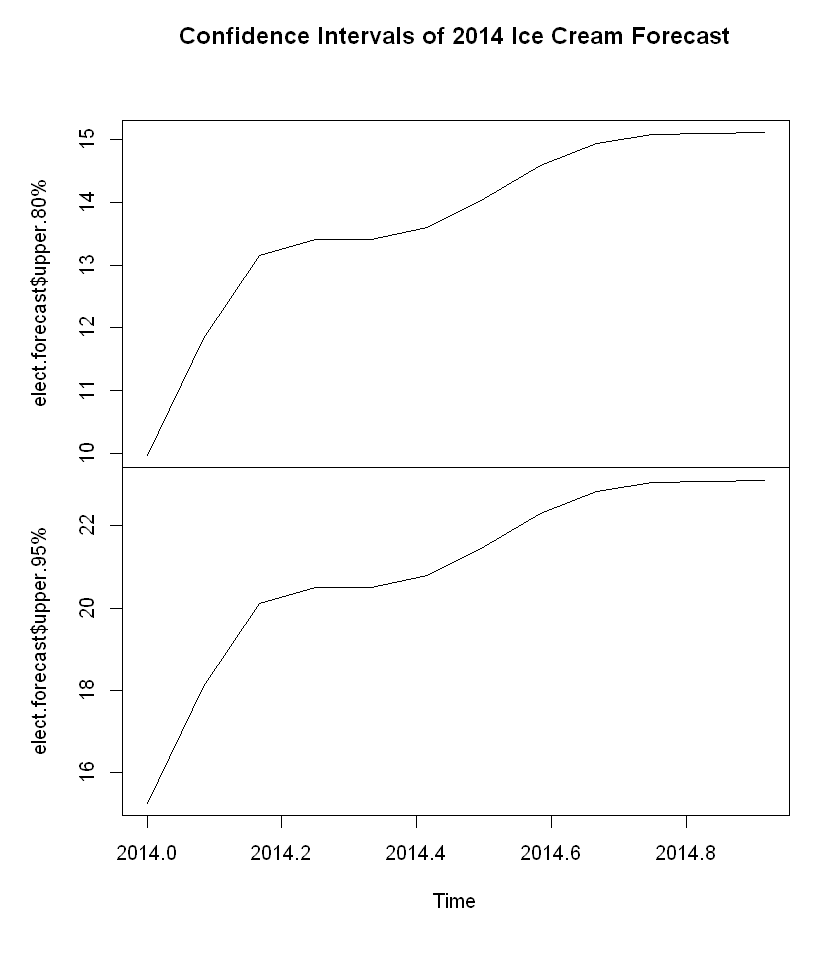

In [30]:
confint <- elect.forecast$upper-elect.forecast$lower
plot(confint,main="Confidence Intervals of 2014 Ice Cream Forecast")